## Image slicing example

In [ ]:
from dotenv import load_dotenv
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import math
import os
import glob

%matplotlib inline

In [ ]:
load_dotenv()

n = 128
stride = 128
channels = 3

f = os.getenv('TEST_FILE')
im = Image.open(f)
im_arr = np.array(im)[:,:,0:3]
plt.figure(figsize=(10,10))
plt.imshow(im_arr)

In [6]:
"""
Slices image into patches of size NxNx3 according to stride
Zero pads any patches that are cut off at borders of image
Returns numpy array of image patches
"""

def slice_image(img, n, stride, channels):
    x_dim, y_dim = img.shape[0], img.shape[1]
    
    # calculate number of output cubes
    num_x = math.ceil((x_dim-n)/stride + 1)
    num_y = math.ceil((y_dim-n)/stride + 1)

    # iterate through img 
    results = np.zeros((num_x*num_y, n, n, channels), dtype=int)
    counter = 0

    for i in range(num_y):
        y = 0 if i==0 else y + stride
        for j in range(num_x):
            x = 0 if j==0 else x + stride

            cube = img[x:x+n, y:y+n]
            
            dims = cube.shape
            if channels == 1:
                cube = cube.reshape((dims[0],dims[1],1))
            results[counter,0:cube.shape[0],0:cube.shape[1]] = cube
            counter += 1
    return results

In [11]:
# Example usage
results = slice_image(im_arr, n, stride, channels)

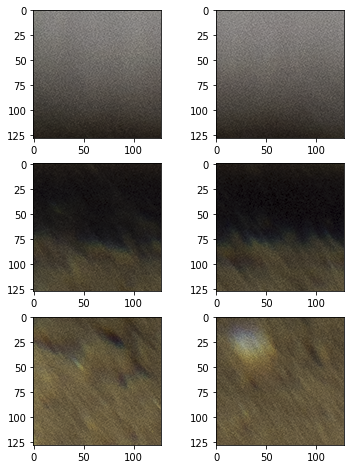

In [5]:
# Display results
fig, axs = plt.subplots(3,2,figsize=(6,8))

axs[0,0].imshow(results[0])
axs[1,0].imshow(results[1])
axs[2,0].imshow(results[2])
axs[0,1].imshow(results[47])
axs[1,1].imshow(results[48])
axs[2,1].imshow(results[49])

## Slice all images and masks

In [4]:
load_dotenv()

im_dir = os.getenv('IMAGE_DIR')
mask_dir = os.getenv('MASK_DIR')

postfix = '_sliced'
n = 128

im_dir_out = im_dir + postfix
mask_dir_out = mask_dir + postfix

In [ ]:
import time
start_time = time.time()

im_filenames = glob.glob(im_dir+'/*.npy', recursive=True)
mask_filenames = glob.glob(mask_dir+'/*.npy', recursive=True)

# Create output directories 
if not os.path.exists(im_dir_out):
    os.makedirs(im_dir_out)
if not os.path.exists(mask_dir_out):
    os.makedirs(mask_dir_out)

fig, axs = plt.subplots(1,2,figsize=(20,20))
for i, im_filename in enumerate(im_filenames):
    im = np.load(im_filename)
    filename = im_filename.split('/')[-1] #get image name
    mask = np.load(os.path.join(mask_dir,filename))

    axs[0].imshow(im)
    axs[1].imshow(mask)

    im_slices = slice_image(im, n, stride, 3)
    mask_slices = slice_image(mask, n, stride, 1)

    for j, im_slice in enumerate(im_slices):
        np.save(os.path.join(im_dir_out,filename.split('.')[0]+'_'+str(j)+'.npy'), im_slice)

    for k, mask_slice in enumerate(mask_slices):
        np.save(os.path.join(mask_dir_out,filename.split('.')[0]+'_'+str(k)+'.npy'), mask_slice)
        
    print('processed image', i)

processed image 0
processed image 1
processed image 2
processed image 3
processed image 4
processed image 5
processed image 6
processed image 7
processed image 8
processed image 9
processed image 10
processed image 11
processed image 12
processed image 13
processed image 14
processed image 15
processed image 16
processed image 17
processed image 18
processed image 19
processed image 20
processed image 21
processed image 22
processed image 23
processed image 24
processed image 25
processed image 26
processed image 27
processed image 28
processed image 29
processed image 30
processed image 31
processed image 32
processed image 33
processed image 34
processed image 35
processed image 36
processed image 37
processed image 38
processed image 39
processed image 40
processed image 41
processed image 42
processed image 43
processed image 44
processed image 45
processed image 46
processed image 47
processed image 48
processed image 49
processed image 50
processed image 51
processed image 52
pro